In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 5.4 損失関数

### 5.4.1 二乗和誤差

In [2]:
import numpy as np

def square_sum(y, t): # 出力値と正解値を引数に取る
    return 1.0 / 2.0 * np.sum(np.square(y - t))

### 5.4.2 交差エントロピー誤差

In [3]:
import numpy as np

def cross_entropy(y, t): # 出力値と正解値を引数に取る
    return - np.sum(t * np.log(y + 1e-7)) # 1e-7は無限小に発散することを防いでいる

## 5.9 バックプロパゲーションの実装 -回帰-

### 5.9.2 出力層の実装

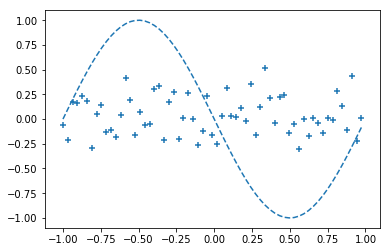

Epoch:0/2001 Error:0.26826034719567726


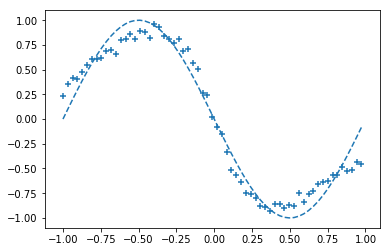

Epoch:200/2001 Error:0.00935001434829098


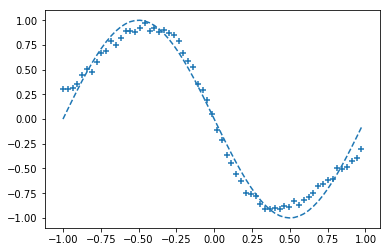

Epoch:400/2001 Error:0.00555870937460672


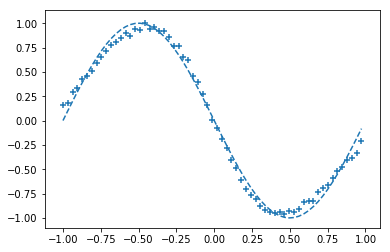

Epoch:600/2001 Error:0.0023412717796362464


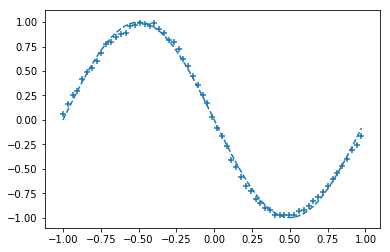

Epoch:800/2001 Error:0.0007112897791679705


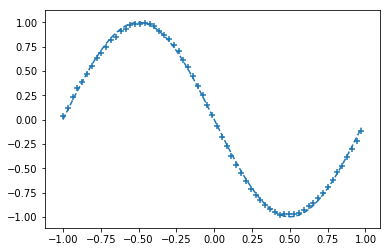

Epoch:1000/2001 Error:0.000231553280166773


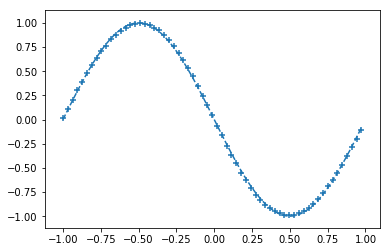

Epoch:1200/2001 Error:8.077401669025178e-05


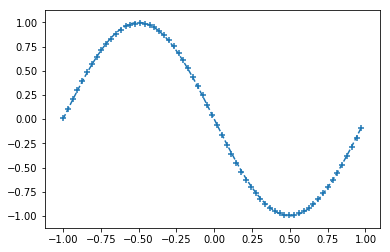

Epoch:1400/2001 Error:3.2264586628602006e-05


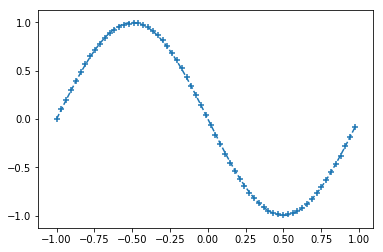

Epoch:1600/2001 Error:1.5271474719061502e-05


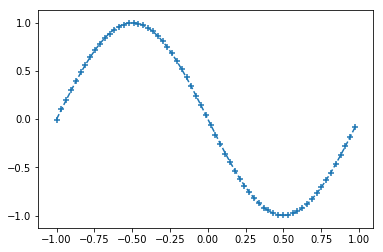

Epoch:1800/2001 Error:1.0267867835147501e-05


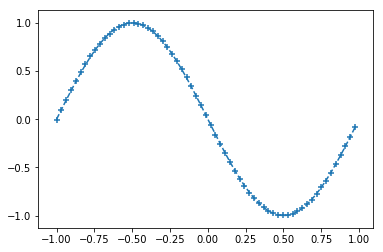

Epoch:2000/2001 Error:8.043525203843332e-06


In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 入力と正解の用意
input_data = np.arange(0, np.pi * 2, 0.1) # 入力
correct_data = np.sin(input_data)         # 正解
input_data = (input_data - np.pi)/ np.pi  # 入力を-1.0~1.0の範囲に
n_data = len(correct_data)

# 各設定値
n_in = 1  # 入力層のニューロン層
n_mid = 3 # 中間層のニューロン層
n_out = 1 # 出力層のニューロン層

wb_width = 0.01 # 重みとバイアスの広がり具合
eta = 0.1
epoch = 2001
interval = 200

# 中間層
class MiddleLayer: 
    def __init__(self, n_upper, n):  # 初期設定
        # 重み（行列）とバイアス（ベクトル）
        self.w = wb_width * np.random.randn(n_upper, n) # 重み（行列）
        self.b = wb_width * np.random.randn(n)          # バイアス（ベクトル）
    
    def forward(self, x):       # 順伝播
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1 / (1 + np.exp(-u)) # シグモイド関数
        
    def backward(self, grad_y): # 逆伝播
        delta = grad_y * (1 - self.y) * self.y # シグモイド関数の微分
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):      # 重みとバイアスの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b 

class OutputLayer: 
    def __init__(self, n_upper, n): # 初期設定
        self.w = wb_width * np.random.randn(n_upper, n) # 重み（行列）
        self.b = wb_width * np.random.randn(n)          # バイアス
        
    def forward(self, x):  # 順伝播
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u         # 恒等関数
    
    def backward(self, t): # 逆伝播
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta): # 重みとバイアスの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

# -- 各層の初期化 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 学習 --
for i in range(epoch):

    # インデックスをシャッフル
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 結果の表示用
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        
        x = input_data[idx:idx+1]  # 入力
        t = correct_data[idx:idx+1]  # 正解
        
        # 順伝播
        middle_layer.forward(x.reshape(1, 1))  # 入力を行列に変換
        output_layer.forward(middle_layer.y)  

        # 逆伝播
        output_layer.backward(t.reshape(1, 1))  # 正解を行列に変換
        middle_layer.backward(output_layer.grad_x)
        
        # 重みとバイアスの更新
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1)  # 行列をベクトルに戻す

            # 誤差の計算
            total_error += 1.0/2.0*np.sum(np.square(y - t))  # 二乗和誤差
            
            # 出力の記録
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval == 0:
        
        # 出力のグラフ表示
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # エポック数と誤差の表示
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))

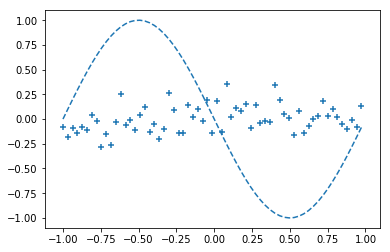

Epoch:0/2001 Error:0.2822353626926596


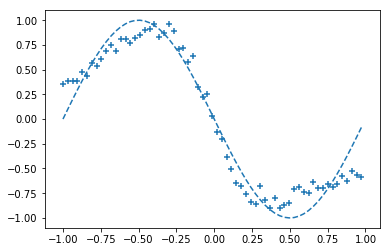

Epoch:200/2001 Error:0.013968149423549445


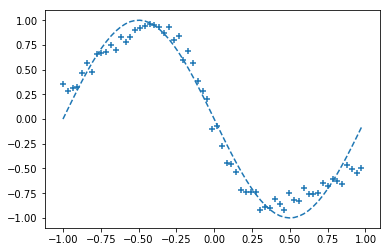

Epoch:400/2001 Error:0.010300013339966428


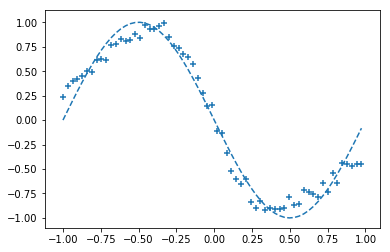

Epoch:600/2001 Error:0.008307005616531122


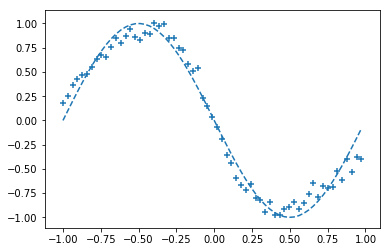

Epoch:800/2001 Error:0.0063991479117024635


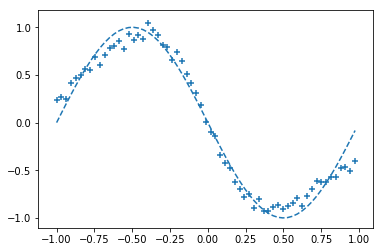

Epoch:1000/2001 Error:0.0067276946451898115


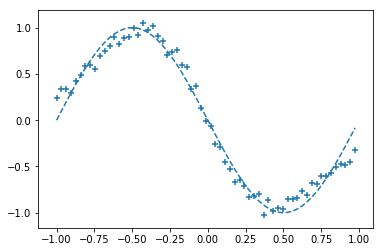

Epoch:1200/2001 Error:0.005797547940246464


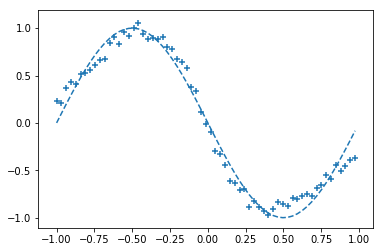

Epoch:1400/2001 Error:0.00602838630427883


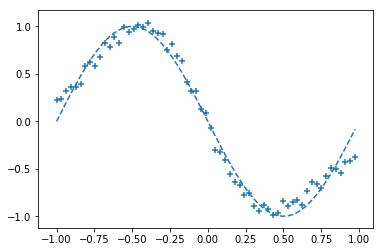

Epoch:1600/2001 Error:0.005239792785759831


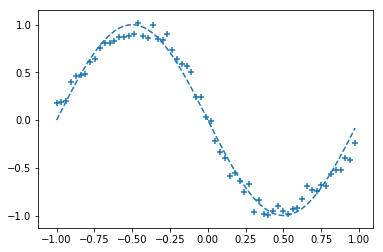

Epoch:1800/2001 Error:0.004214686286373266


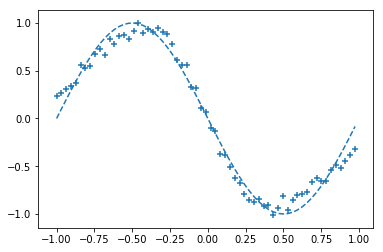

Epoch:2000/2001 Error:0.005455392871949216


In [5]:
# 各設定値
n_in = 1  # 入力層のニューロン層
n_mid = 2 # 中間層のニューロン層
n_out = 1 # 出力層のニューロン層

# -- 各層の初期化 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 学習 --
for i in range(epoch):

    # インデックスをシャッフル
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 結果の表示用
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        
        x = input_data[idx:idx+1]  # 入力
        t = correct_data[idx:idx+1]  # 正解
        
        # 順伝播
        middle_layer.forward(x.reshape(1, 1))  # 入力を行列に変換
        output_layer.forward(middle_layer.y)  

        # 逆伝播
        output_layer.backward(t.reshape(1, 1))  # 正解を行列に変換
        middle_layer.backward(output_layer.grad_x)
        
        # 重みとバイアスの更新
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1)  # 行列をベクトルに戻す

            # 誤差の計算
            total_error += 1.0/2.0*np.sum(np.square(y - t))  # 二乗和誤差
            
            # 出力の記録
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval == 0:
        
        # 出力のグラフ表示
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # エポック数と誤差の表示
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))

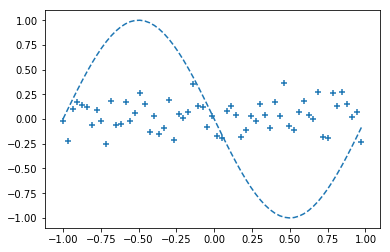

Epoch:0/2001 Error:0.266947662551172


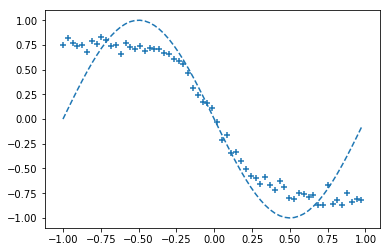

Epoch:200/2001 Error:0.039572529321099656


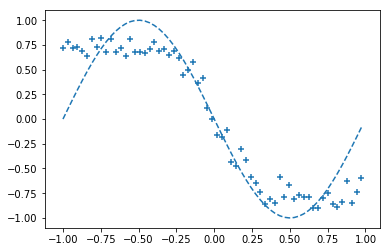

Epoch:400/2001 Error:0.034623865189276584


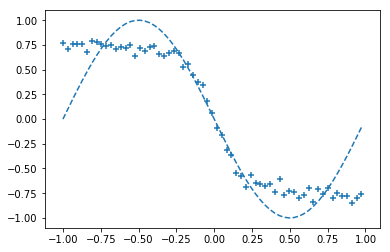

Epoch:600/2001 Error:0.03704834789967293


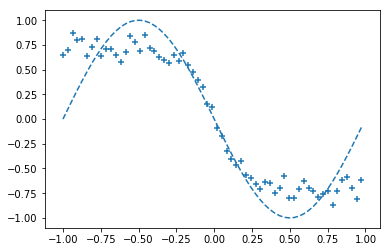

Epoch:800/2001 Error:0.03519291211726743


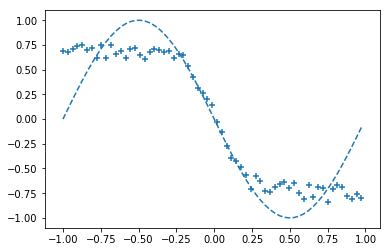

Epoch:1000/2001 Error:0.03668640391923733


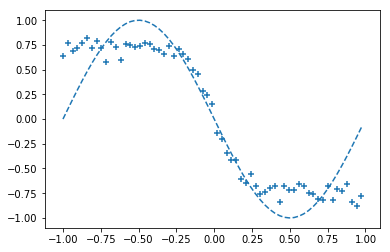

Epoch:1200/2001 Error:0.03574731716369247


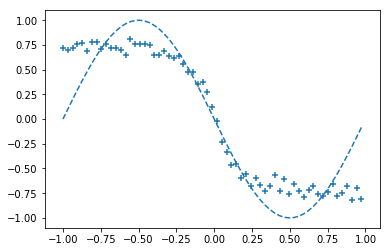

Epoch:1400/2001 Error:0.036188051024221166


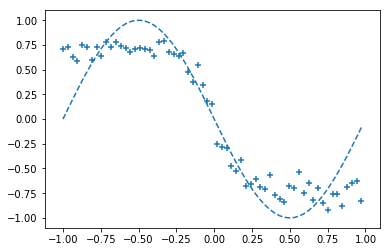

Epoch:1600/2001 Error:0.03414558374342608


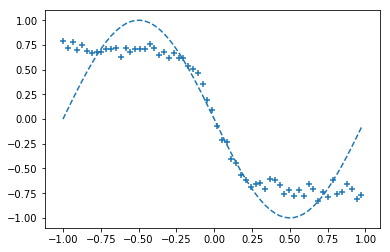

Epoch:1800/2001 Error:0.03597783342324485


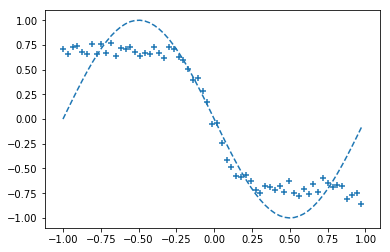

Epoch:2000/2001 Error:0.03610332608625086


In [6]:
# 各設定値
n_in = 1  # 入力層のニューロン層
n_mid = 1 # 中間層のニューロン層
n_out = 1 # 出力層のニューロン層

# -- 各層の初期化 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 学習 --
for i in range(epoch):

    # インデックスをシャッフル
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 結果の表示用
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        
        x = input_data[idx:idx+1]  # 入力
        t = correct_data[idx:idx+1]  # 正解
        
        # 順伝播
        middle_layer.forward(x.reshape(1, 1))  # 入力を行列に変換
        output_layer.forward(middle_layer.y)  

        # 逆伝播
        output_layer.backward(t.reshape(1, 1))  # 正解を行列に変換
        middle_layer.backward(output_layer.grad_x)
        
        # 重みとバイアスの更新
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1)  # 行列をベクトルに戻す

            # 誤差の計算
            total_error += 1.0/2.0*np.sum(np.square(y - t))  # 二乗和誤差
            
            # 出力の記録
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval == 0:
        
        # 出力のグラフ表示
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # エポック数と誤差の表示
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))

## 5.10 バックプロパゲーションの実装 -分類-

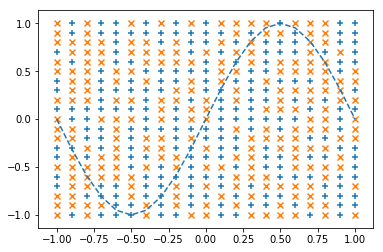

Epoch:0/101 Error:0.7210250117028361


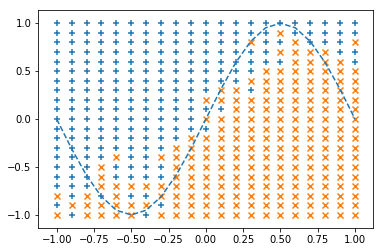

Epoch:10/101 Error:0.31240784719800124


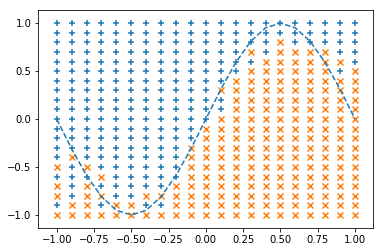

Epoch:20/101 Error:0.22200197266352711


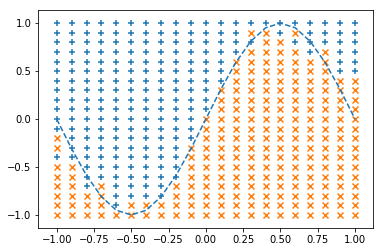

Epoch:30/101 Error:0.1707144438613876


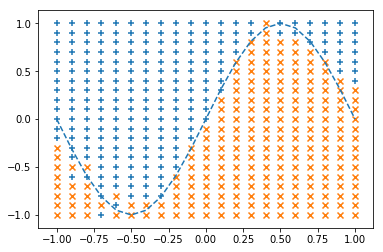

Epoch:40/101 Error:0.12931704421493576


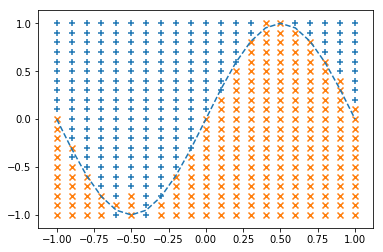

Epoch:50/101 Error:0.09805479502389088


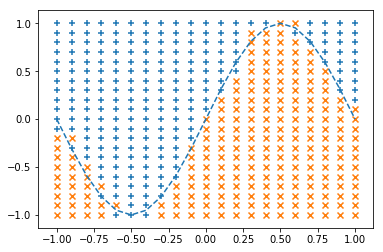

Epoch:60/101 Error:0.09131865365311945


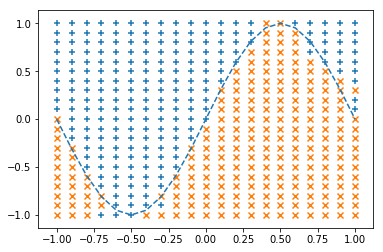

Epoch:70/101 Error:0.07701075262389154


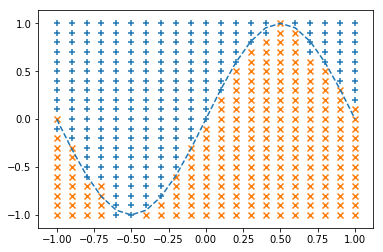

Epoch:80/101 Error:0.07003144952223701


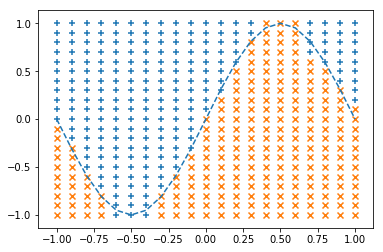

Epoch:90/101 Error:0.07791052367472101


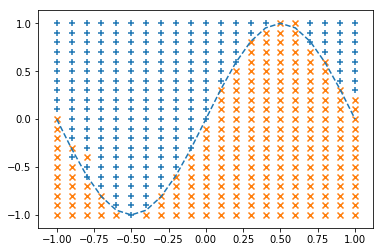

Epoch:100/101 Error:0.06192301011649567


In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# -- 座標 --
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

# -- 入力、正解データを作成 --
input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x):  # y座標がsinカーブよりも下であれば
            correct_data.append([0, 1])  # 下の領域
        else:
            correct_data.append([1, 0])  # 上の領域
            
n_data = len(correct_data)  # データ数

input_data = np.array(input_data)
correct_data = np.array(correct_data)
            
# -- 各設定値 --
n_in = 2  # 入力層のニューロン数
n_mid = 6  # 中間層のニューロン数
n_out = 2  # 出力層のニューロン数

wb_width = 0.01  # 重みとバイアスの広がり具合
eta = 0.1  # 学習係数
epoch = 101
interval = 10  # 経過の表示間隔

# -- 中間層 --
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)  # 重み（行列）
        self.b = wb_width * np.random.randn(n)  # バイアス（ベクトル）

    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))  # シグモイド関数
    
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*self.y
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

# -- 出力層 --
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)  # 重み（行列）
        self.b = wb_width * np.random.randn(n)  # バイアス（ベクトル）
    
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)  # ソフトマックス関数
    
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
# -- 各層の初期化 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 学習 --
sin_data = np.sin(np.pi * X) # 結果の検証用
for i in range(epoch):

    # インデックスをシャッフル
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 結果の表示用
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
       
    for idx in index_random:
        
        x = input_data[idx]
        t = correct_data[idx]

        # 順伝播
        middle_layer.forward(x.reshape(1,2))
        output_layer.forward(middle_layer.y)

        # 逆伝播
        output_layer.backward(t.reshape(1,2))
        middle_layer.backward(output_layer.grad_x)
        
        # 重みとバイアスの更新
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1)  # 行列をベクトルに戻す
            
            # 誤差の計算
            total_error += - np.sum(t * np.log(y + 1e-7)) # 交差エントロピー誤差
            
            # 確率の大小を比較し、分類する
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
            
    if i%interval == 0:
        
        # 出力のグラフ表示
        plt.plot(X, sin_data, linestyle="dashed")
        plt.scatter(x_1, y_1, marker="+")
        plt.scatter(x_2, y_2, marker="x")
        plt.show()
        
        # エポック数と誤差の表示
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))